# 機器學習 - 回歸模型 (Regression Model) (2)
- 2022 機器學習 Summer Session 教材 (師培中心)<br>
- @ 台南應用科技大學 資管系 杜主民

## Regulization 正規化 - Ridge Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7.0, 5.0)  

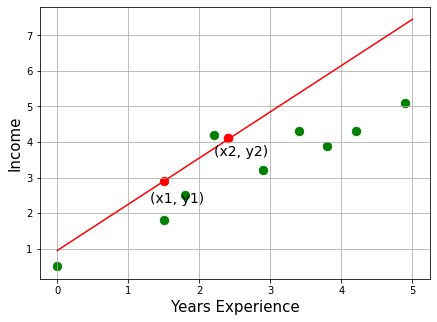

In [2]:
# 紅色點 & Regression line
w0 = 0.95  # 截距
w1 = 1.3  # 斜率
x = np.linspace(0, 5, 100)
y = w0 + x*w1
plt.plot(x, y, c='r')
plt.scatter(1.5, 2.9, s=70, c='r')         # (x1,y1)
plt.text(1.3, 2.3, '(x1, y1)', fontsize=14) 
plt.scatter(2.4, 4.1, s=75, c='r')         # (x2,y2)
plt.text(2.2, 3.6, '(x2, y2)', fontsize=14)

# 綠色點 & Regression line
greenX = np.array([0, 1.5, 1.8, 2.2, 2.9, 3.4, 3.8, 4.2, 4.9])
greenY = [0.5, 1.8, 2.5, 4.2, 3.2, 4.3, 3.9, 4.3, 5.1]
plt.scatter(greenX, greenY, c='g', s=70)

plt.xlabel('Years Experience', fontsize=15)
plt.ylabel('Income', fontsize=15)
plt.grid(True)

### $Ridge \,Regression = Loss(w_0, w_1) + 懲罰值$ 
### $Ridge \,Regression = (y_i - \hat y)^2 + \lambda * slope^2$ 

## 第一種情況: 簡單線性迴歸 (只有一個 input feature)
### 由迴歸模型計算得出的迴歸線計算 ridge regression value
### 因為完全擬合，所以損失函數 (最小平方法, Lease Square) $\Rightarrow \,(y_i - \hat y)^2 = 0$
### 假設 $\lambda = 1$，斜率 slope = 1.3  

### 原始損失函數 + Ridge Regression Penalty 
### $\Rightarrow \boxed{Ridge \,Regression = (y_i - \hat y)^2 + \lambda * slope^2 = 0 + 1 * 1.3^2 = 1.69}$

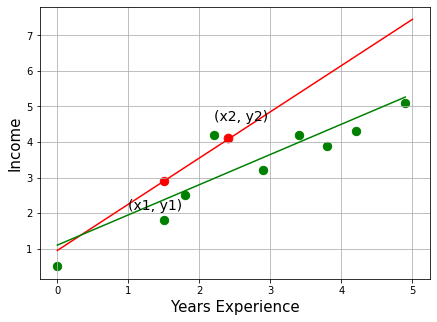

In [3]:
# 紅色點 & Regression line
w0 = 0.95  # 截距
w1 = 1.3  # 斜率
x = np.linspace(0, 5, 100)
y = w0 + x*w1
plt.plot(x, y, c='r')
plt.scatter(1.5, 2.9, s=70, c='r')       # (x1,y1)
plt.text(1, 2.1, '(x1, y1)', fontsize=14) 
plt.scatter(2.4, 4.1, s=75, c='r')       # (x1,y1)
plt.text(2.2, 4.6, '(x2, y2)', fontsize=14)

# 綠色點 & Regression line
w0 = 1.1  # 截距
w1 = 0.85  # 斜率
greenX = np.array([0, 1.5, 1.8, 2.2, 2.9, 3.4, 3.8, 4.2, 4.9])

greenY=w0 + greenX*w1
plt.plot(greenX, greenY, c='g')
greenY = [0.5,1.8, 2.5, 4.2, 3.2, 4.2, 3.9, 4.3, 5.1]
plt.scatter(greenX, greenY, c='g', s=70)

plt.xlabel('Years Experience', fontsize=15)
plt.ylabel('Income', fontsize=15)
plt.grid(True)

### 再來考慮上述綠色線條的 Ridge Regression
### 在此 $\lambda$ 仍然等於 1，但斜率 slope = 0.8  
### $\, \Rightarrow \lambda * slope^2 = 1 * (0.8)^2 = 0.64$
### 因為不是完全擬合，$(x_1,y_1)$ 的殘差是 0.3，$(x_2,y_2)$殘差是 0.8
### 損失函數 + Ridge Regression Penalty
### $\Rightarrow Ridge \,Regression = (y_i - \hat y)^2 + \lambda * slope^2$ 
### $\Rightarrow \,(0.3)^2+(0.8)^2 + 0.64 = 1.37$

### 因此，如果我們要選擇 原始損失函數 + Ridge Regression Penalty 的最小值，會選擇 Ridge Regression Line，而不是原本的 Least Squares Line。

## 第二種情況: 多元迴歸 (假設有多個 input features)
### 實際的案例不會像第一種狀況般的簡單，輸入的 features 經常是多元型態。
### 例如，假設決定一輛中古車價格的因素可能有里程數(Milleage)、車齡(Age)、廠牌(Brand) 等等，對應的公式寫法如下:

### $carprice = w_0 + w_1 \cdot Millage + w_2 \cdot Age + w_3 \cdot Brand$
### 
### 因此，損失函數 + Ridge Regression Penalty 的寫法:
### $\Rightarrow = SSR + \lambda \cdot slope^2$
### $\Rightarrow = SSR + \lambda \cdot (slope_M^2 + slope_A^2 + slope_B^2)$ 
- PS: $slope_M^2 + slope_A^2 + slope_B^2$ 分別是 Millage, Age 及 Brand 的斜率

### 以下程式以亂數產生多元迴歸模型數據，再帶入模型訓練。

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge  # Regularization Ridge model 

### 產生 15 筆資料，每筆資料有 10 個欄位的常態分佈亂數

In [5]:
n_samples, n_features = 15, 10        
rng = np.random.RandomState(1)
X = rng.randn(n_samples, n_features)  # 產生 15 筆資料，每筆資料有 10 個欄位的常態分佈亂數
y = rng.randn(n_samples)

lr = LinearRegression()
lr.fit(X, y)
r2 = lr.score(X,y)
print(f'Linear Regression r2= {np.round(r2,2)}')

rdg = Ridge(alpha = 0.5)              # alpha 是投影片的 λ - penalize the model
rdg.fit(X, y)
r2 = rdg.score(X,y)
print(f'Ridge Regression r2= {np.round(r2,2)}')

Linear Regression r2= 0.61
Ridge Regression r2= 0.51


### 上述訓練資料的 Linear Regression 的 $R^2$ 較大，Ridge Regression 的 $R^2$ 較小，表示 Ridge 增加了 Bias，並希望降低訓練資料以外資料的 variance。

In [9]:
print(rdg.coef_,rdg.intercept_)
print('-'*30)
print(lr.coef_,lr.intercept_)

[-0.02073085  0.48158285 -0.15374581  0.29081278 -0.33292636 -0.09476843
  0.02211223  0.15644385  0.5932102   0.72617441] -0.5886064577348356
------------------------------
[ 1.19935146  1.45739159  0.05583209  1.26581305 -0.53053985 -0.56977487
  0.29144173 -0.05429765  2.19187564  2.51457147] -1.9607930635642805


### 測試不同的懲罰值對 Ridge Regression 的影響

```python
n_samples, n_features = 15, 10        
rng = np.random.RandomState(1)
X = rng.randn(n_samples, n_features)   # 產生 15 列，每列 10 欄位的常態分佈亂數
y = rng.randn(n_samples)

Ridge_alpha = np.linspace(1.0, 0.1, 10)  # 產生 10 個懲罰項 alpha，從 1.5 ~ 0.6
for alpha in Ridge_alpha:
    rdg = Ridge(alpha = alpha) # alpha is tuning parameter - penalize the model
    rdg.fit(X, y)
    r2 = rdg.score(X,y)
    print(f'Alpha: {np.round(alpha,2)}, Ridge Regression r2: {np.round(r2,2)}')
```

### 比較 Linear Regression 和 Ridge Regression 對尚未訓練過的資料的測試結果

### 訓練資料

In [10]:
n_samples, n_features = 15, 10        
rng = np.random.RandomState(1)         # 訓練資料的亂數種子是 1
X = rng.randn(n_samples, n_features)   # 產生 15 列，每列 10 欄位的常態分佈亂數
y = rng.randn(n_samples)

lr = LinearRegression()   # Linear Regression
lr.fit(X, y)
r2 = lr.score(X,y)
print(f'Linear Regression r2= {np.round(r2,2)}')

rdg = Ridge(alpha = 0.5)  # Ridge Regression
rdg.fit(X, y)
r2 = rdg.score(X,y)
print(f'Ridge Regression r2= {np.round(r2,2)}')

Linear Regression r2= 0.61
Ridge Regression r2= 0.51


### 測試資料
- 選用和訓練資料不同的隨機種子
- Linear Regression 使用訓練資料的 `lr` model 物件
- Ridge Regression 也用和訓練相同的資料集
- 資料的筆數和特徵值相同

In [11]:
n_samples, n_features = 15, 10    
rng = np.random.RandomState(2)         # 訓練資料的亂數種子是 2
X = rng.randn(n_samples, n_features)   # 產生 15 列，每列 10 欄位的常態分佈亂數
y = rng.randn(n_samples)

r2 = lr.score(X, y)       # 使用訓練資料的 `lr` model 物件
print(f'Linear Regression r2= {np.round(r2, 2)}')

rdg = Ridge(alpha = 0.5)  
rdg.fit(X, y)
r2 = rdg.score(X,y)
print(f'Ridge Regression r2= {np.round(r2,2)}')

Linear Regression r2= -16.21
Ridge Regression r2= 0.75


### 上述可以看出 Linear Regression 對尚未訓練過的資料的決定係數 $r^2$ 明顯小於 Ridge Regression 的決定係數 $r^2$。
### 意味著對單純採用最小平方法的 Linear Regression，雖然在訓練資料的 $r^2=0.61$ 優於 Ridge Regression；但測試資料的 Variance 很高，其 $r^2=\,$-16.21，而 Ridge Regression 在測試資料仍能保持較佳的 Variance，其  $r^2=0.75$ 明顯優於 Linear Regression。

<a href='https://help.mobagel.com/zh-TW/support/solutions/articles/47000741407-%E7%82%BA%E4%BB%80%E9%BA%BC%E6%9C%89%E4%BA%9B%E6%A8%A1%E5%9E%8B%E7%9A%84%E6%B1%BA%E5%AE%9A%E4%BF%82%E6%95%B8-r-squared-%E6%95%B8%E5%80%BC%E6%98%AF%E8%B2%A0%E6%95%B8-'>為什麼決定係數 r^2 會小於 0</a>

## Regulization 正規化 - Lasso Regression (暫略)

## 練習題四
- 使用 sklearn 的 Boston House 資料集。
- 請載入 `from sklearn.datasets import load_boston`，再執行 `load_boston()`函數，建立資料集物件變數, e.g., `boston_dataset=load_boston()`.
- boston_dataset 物件有幾個屬性:
    - data: 特徵值資料
    - DESCR: 描述性敘述
    - feature_names: 欄位名稱 (請參考底下說明)
    - target: 目標值
- 請將 data 當成 features 欄位；將 target 屬性當成目標。


- CRIM :每個城鎮的人均犯罪率 (per capita crime rate by town)
- ZN : 佔地25,000平方英尺以上的住宅區域比例(proportion of residential land zoned for lots over 25,000 sq.ft.)
- INDUS : 每個城鎮非零售業的營業面積比例(proportion of non-retail business acres per town)
- CHAS : 是否靠近河邊(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))
- NOX : 一氧化氮濃度（ppm)(nitric oxides concentration (parts per 10 million))
- RM : 每個住宅的平均房間數(average number of rooms per dwelling)
- AGE : 1940年前私有住宅的住房比率(proportion of owner-occupied units built prior to 1940)
- DIS : 與五個波士頓就業中心的加權距離(weighted distances to five Boston employment centres)
- RAD : 徑向公路的通達指數(index of accessibility to radial highways)
- TAX : 每10,000美元的所需繳的財產稅(full-value property-tax rate per 10,000)
- PTRATIO : 每個城鎮的師生比例(pupil-teacher ratio by town)
- B : 黑人比例(值為$1000(Bk-0.63)^2$ where Bk is the proportion of blacks by town)
- LSTAT : 中下階級的比率(% lower status of the population)

### 題目 (延續 Regression迴歸模型_1.ipynb 練習題三)
1. 請分割訓練和測試資料後執行Linear Regression，以及 Ridge Regression，檢驗訓練資料和測試資料的 $r^2$。
2. 依據資料集的 feature_names 欄位名稱，只取 CRIM 此欄位小於等於 1.5 的資料當成 training data，其餘的資料(CRIM 小於 1.5)當成 testing data。
3. 請將 `RM`, `TAX`, `LSTAT` 欄位當 features，MEDV 是 target，將資料分成 60% traiing data, 40% testing data，請計算Linear Regression，Ridge Regression 的 $r^2$

In [12]:
# Solution 4-1


In [ ]:
# Solution 4-2


In [ ]:
# Solution 4-3


<hr style='border-color:brown; border-width:3px'>

## 多項式迴歸 Polynomial Regression
- 多項式迴歸是迴歸分析的一種形式，其中特徵自變數 x 和目標因變量 y 之間不適合使用直線迴歸線來捕捉資料間的趨勢。
- 當特徵自變數與目標之間的關係是彎曲的線條，透過多項式迴歸可建構趨勢曲線貼合資料間的型態。
- 例如 $f(x) = x^2 + 2sin(x)$，$f(x)$ 是 x 的 2 次多項式。
- 多項式迴歸是欲擬合 x 的值與 f(x) 之間的非直線關係。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize']=[9,6]

### $x^2 + 20sin(x)$

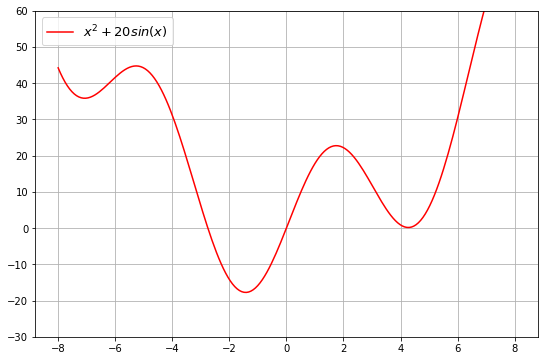

In [3]:
x = np.linspace(-8, 8, 200)
f_x = [np.power(i, 2) + 20 * np.math.sin(i) for i in x]
plt.plot(x, f_x, c='r', label='$x^2+20sin(x)$')
plt.ylim(-30, 60)
plt.grid(True)
plt.legend(fontsize=13)

### 產生 20 筆數值模擬多項式的分布

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[7,5]

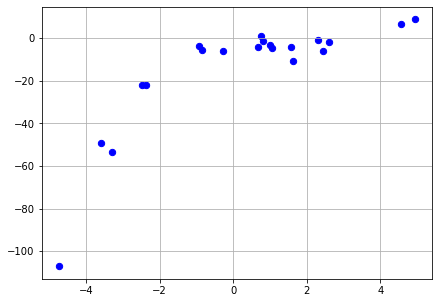

In [7]:
# 產生 20 筆隨機值
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=40, c='b')
plt.grid(True)

### 上述的資料分布使用線性回歸適合嗎?
### 代入 sklearn 的 Linear Regression 模型

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

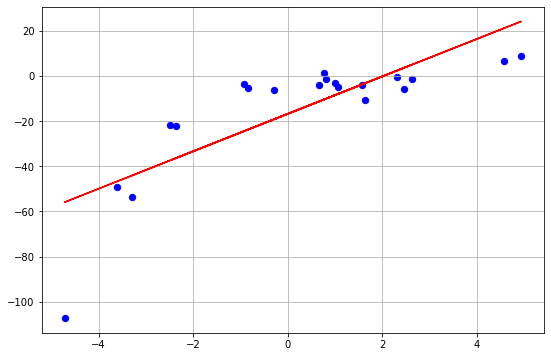

In [11]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
X = x[:, np.newaxis]   # x = x.reshape(len(x),1)
#X = x.reshape(len(x),1)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, s=40, c='b')
plt.plot(X, y_pred, color='r')
plt.grid(True)

### 上述的迴歸線能正確捕捉到資料的趨勢嗎? 檢查決定係數 $R^2$

In [12]:
print(f'決定係數 R^2={model.score(X,y)}')

決定係數 R^2=0.6386750054827146


### 決定係數 $R^2$=0.639，迴歸線$R^2$擬合還算不太差，但可以有更好的度擬合程度。

### 過度擬和 (Overfitting) vs. 低度擬合 (Underfitting)
- 訓練一個機器學習模型時，不論是在訓練集或是測試集資料都無法達到一定的準度時，此狀況稱為 underfitting(低度擬合)。
- Underfitting 的原因可能是「訓練時間不足」或是「模型複雜度不足」。此案例發生 under-fitting 的原因是簡單現行迴歸無法捕捉模型的趨勢，屬於「模型複雜度不足」的原因。

![underfitting](https://miro.medium.com/max/1400/1*UCd6KrmBxpzUpWt3bnoKEA.png)
<p style="text-align:right">source: <a href='https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/'>Linear Regression</a></p>

### 為了改善 Underfitting 的問題，應該改善迴歸模型的複雜度。
### $\Rightarrow \,\,$從簡單線性迴歸  $f(x) = w_0 + w_1x$，更改為 2 次多項式 $f(x) = w_0 + w_1x + w_2x^2$，但仍視為 Linear Regression。
- 採用 sklearn 的 `PolynominalFeatures` 模組

### $y = x_i - 2x_i^2 + 0.5x_i^3 + \beta$

In [13]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures 

2 polynominal 決定係數 R^2=0.8392002817705799


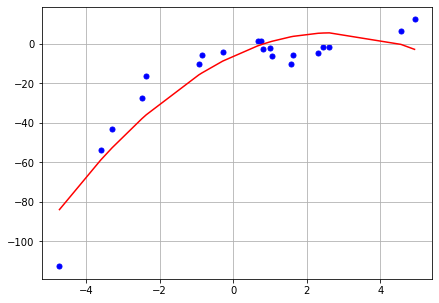

In [19]:
# source: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
plt.rcParams['figure.figsize']=[7,5]
np.random.seed(0)
X = np.sort(2 - 3 * np.random.normal(0, 1, 20))
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
X = X[:, np.newaxis]
#X = x.reshape(len(x),1)

polynomial_features = PolynomialFeatures(degree=2)  # 二次多項式
X_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)
plt.scatter(X, y, s=25, c='b')
plt.plot(X, y_poly_pred, color='r', label='2 polynominal')
print(f'2 polynominal 決定係數 R^2={r2_score(y, y_poly_pred)}')
plt.grid(True)

### 得出二次多項式 $R^2 = 0.8392002817705799$

### 帶入 intercept_ 以及 coef_

In [20]:
model.coef_

array([ 0.        ,  8.73901887, -1.63500804])

In [30]:
# 計算 rmse & r2
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(f'RMSE={rmse}')
print(f'R^2={r2}')

RMSE=10.960190607855624
R^2=0.8392002817705799


### 若是以更高的多項式進行計算呢?

2 polynominal 決定係數 R^2=0.9991935925018846


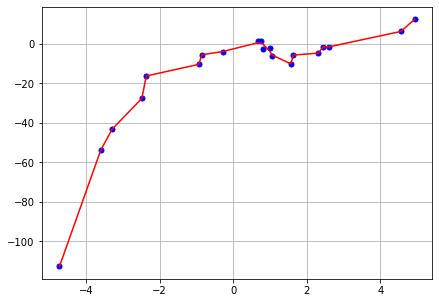

In [31]:
plt.rcParams['figure.figsize']=[7,5]
np.random.seed(0)
X = np.sort(2 - 3 * np.random.normal(0, 1, 20))
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
X = X[:, np.newaxis]
#X = x.reshape(len(x),1)

polynomial_features = PolynomialFeatures(degree=20)  # 20 次多項式
X_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)
plt.scatter(X, y, s=25, c='b')
plt.plot(X, y_poly_pred, color='r', label='2 polynominal')
print(f'2 polynominal 決定係數 R^2={r2_score(y, y_poly_pred)}')
plt.grid(True)

### 得出 20 次多項式 $R^2 = 0.9991935925018846$

### 顯示 intercept_ 以及 coef_

In [33]:
print('intercept:', model.intercept_)
print('coef_:', model.coef_)  

intercept: -3.985340088292748
coef_: [ 3.72700940e-02  3.35721861e+00  1.14876877e+01 -3.75878859e+00
 -4.39097290e+00 -7.86232689e-01 -1.18393610e+01  4.19317619e+00
 -6.11357492e+00  6.91997280e+00  6.23100521e+00 -4.63258354e+00
 -1.66840112e+00  1.02730299e+00  2.10996764e-01 -1.02800657e-01
 -1.37014382e-02  4.65846004e-03  4.13375613e-04 -7.72853885e-05
 -4.32303003e-06]


### 如果想要提高迴歸模型的擬合程度，多項式的次數愈高你和程度愈佳；
### 但是對訓練資料的擬合程度愈高，可能會導致對測試資料的 Variances 不佳。